In [1]:
from loczcit_iqr.core.data_loader import NOAADataLoader

loader = NOAADataLoader()
removed = loader.clear_cache(confirm=True)
print(f"{removed} arquivos removidos do cache.")


2025-09-28 18:00:13,393 - loczcit_iqr.core.data_loader - INFO - Removido: olr-daily_v01r02-preliminary_20240101_20241231.nc
2025-09-28 18:00:13,394 - loczcit_iqr.core.data_loader - ERROR - Erro ao remover data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc: [WinError 32] O arquivo já está sendo usado por outro processo: 'data_cache\\olr-daily_v01r02-preliminary_20250101_20250907.nc'
2025-09-28 18:00:13,396 - loczcit_iqr.core.data_loader - INFO - Total de arquivos removidos: 1


✅ 18 fontes da biblioteca loczcit_iqr registradas com sucesso.
🎨 Estilo tipográfico profissional loczcit_iqr aplicado.
🌊 LOCZCIT-IQR v0.0.1 carregada!
   📖 Use lz.quick_start_guide() para começar
   🔧 Use lz.check_modules() para verificar módulos
1 arquivos removidos do cache.


In [1]:
# ========================================================================
# --- ETAPA 0: CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÕES ---
# ========================================================================
import sys
from pathlib import Path


print("="*60)
print("🔧 ETAPA 0: CONFIGURANDO O AMBIENTE...\n")

# Adicionar o caminho da sua biblioteca para que o Python a encontre
# ATENÇÃO: Altere este caminho para o local correto no seu computador
try:
    #Adicionando F:\loczcit-library\your_self ao sys.path
    project_root = Path('..')
    if project_root.exists() and str(project_root) not in sys.path:
        sys.path.insert(0, str(project_root))
        print(f"✅ Caminho do projeto adicionado: {project_root}")
    elif not project_root.exists():
        raise FileNotFoundError
except (FileNotFoundError, IndexError):
    print("❌ ERRO: O caminho do projeto não foi encontrado. Verifique a variável 'project_root'.")
    # Se o script não puder encontrar a biblioteca, ele para aqui.
    sys.exit(1)

# Importar todos os módulos necessários da sua biblioteca LoczcitIQR
try:
    from loczcit_iqr.core.data_loader import NOAADataLoader, load_olr_data
    from loczcit_iqr.core.processor import DataProcessor
    from loczcit_iqr.core.iqr_detector import IQRDetector
    from loczcit_iqr.core.spline_interpolator import SplineInterpolator, SplineParameters, InterpolationMethod
    from loczcit_iqr.plotting.visualizer import ZCITVisualizer, ZCITColormap
    import warnings
    warnings.filterwarnings('ignore')  # Para um notebook mais limpo
    print("✅ Módulos da biblioteca LoczcitIQR importados com sucesso.")
    import numpy as np
    import logging
except ImportError as e:
    print(f"❌ ERRO: Falha ao importar módulos da biblioteca LoczcitIQR: {e}")
    print("💡 Verifique se o caminho do projeto está correto e se os arquivos .py existem.")
    sys.exit(1)

🔧 ETAPA 0: CONFIGURANDO O AMBIENTE...

✅ Caminho do projeto adicionado: ..
✅ 18 fontes da biblioteca loczcit_iqr registradas com sucesso.
🎨 Estilo tipográfico profissional loczcit_iqr aplicado.
🌊 LOCZCIT-IQR v0.0.1 carregada!
   📖 Use lz.quick_start_guide() para começar
   🔧 Use lz.check_modules() para verificar módulos
✅ Módulos da biblioteca LoczcitIQR importados com sucesso.


In [2]:
# instanciação
loader = NOAADataLoader()
print(loader)

# Verificar conectividade
status = loader.get_server_status()
print(f"\nStatus do servidor NOAA:")
print(f"  - Conectividade: {'✓' if status['connectivity'] else '✗'}")
print(f"  - Tempo de resposta: {status['response_time_ms']} ms")
print(f"  - Arquivos disponíveis: {status['available_files']}")

# Estimar tamanho de download
estimate = loader.estimate_download_size('2023-01-01', '2023-12-31')
print(f"\nEstimativa para 2023:")
print(f"  - Tamanho: {estimate['estimated_size_mb']} MB")
print(f"  - Tempo: {estimate['estimated_download_time_readable']}")

NOAA OLR Data Loader (cache: data_cache)

Status do servidor NOAA:
  - Conectividade: ✓
  - Tempo de resposta: 1000 ms
  - Arquivos disponíveis: 47

Estimativa para 2023:
  - Tamanho: 182.5 MB
  - Tempo: 3 minutos


In [3]:
# ============================================================================
# 8. DOWNLOAD DE ARQUIVO ESPECÍFICO
# ============================================================================

ano = 2023

try:
    # Baixar dados de um ano específico
    arquivo_baixado = loader.download_year_data(
        year=ano,
        show_progress=True
    )
    
    print(f"✅ Arquivo baixado: {arquivo_baixado}")
    
    # Também é possível baixar um arquivo específico pelo nome
    # arquivo_especifico = loader.download_file(
    #     filename="olr-daily_v01r02_20230101_20231231.nc",
    #     force_download=False,
    #     show_progress=True
    # )
    
except Exception as e:
    print(f"❌ Erro no download: {e}")

print()

2025-09-28 18:01:06,967 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20230101_20231231.nc
2025-09-28 18:01:07,706 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20230101_20231231.nc
olr-daily_v01r02_20230101_20231231.nc: 100%|██████████| 94.6M/94.6M [00:19<00:00, 4.85MB/s]
2025-09-28 18:01:28,266 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20230101_20231231.nc


✅ Arquivo baixado: data_cache\olr-daily_v01r02_20230101_20231231.nc



In [4]:

ano = 2024

olr_data = loader.load_data(
    start_date=f"{ano}-01-01",
    end_date=f"{ano}-12-31")

print(f"Ano {ano} - Dias após load_data: {len(olr_data.time)}")  # Sempre 365 para não bissexto


2025-09-28 18:02:03,855 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual preliminar: olr-daily_v01r02-preliminary_20240101_20241231.nc
2025-09-28 18:02:04,644 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02-preliminary_20240101_20241231.nc
olr-daily_v01r02-preliminary_20240101_20241231.nc: 100%|██████████| 94.9M/94.9M [00:19<00:00, 4.85MB/s]
2025-09-28 18:02:25,214 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02-preliminary_20240101_20241231.nc
2025-09-28 18:02:25,216 - loczcit_iqr.core.data_loader - INFO - Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20240101_20241231.nc
2025-09-28 18:02:25,231 - loczcit_iqr.core.data_loader - INFO - Removendo 1 dias 29/02
2025-09-28 18:02:25,425 - loczcit_iqr.core.data_loader - WARNING - Dados faltantes: 64800 (0.3%)
2025-09-28 18:02:25,535 - loczcit_iqr.core.data_loader - INFO - Dados carregados com sucesso: FrozenMappingWarningOnValuesAccess({'time'

Ano 2024 - Dias após load_data: 365


In [9]:
# Instanciar com configurações padrão
processor = DataProcessor()

# Instanciar desabilitando Dask e com um nível de log mais detalhado
# import logging
# processor_debug = DataProcessor(use_dask=False, log_level=logging.DEBUG)
print(processor)

2025-09-28 18:07:11,678 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
<DataProcessor(use_dask=True, n_workers=4, cache=0/5, default_area=✓)>


In [10]:
# Assumindo que 'olr_data' é um xr.Dataset carregado para o ano de 2024
# e 'processor' é uma instância de DataProcessor

# Exemplo: Criar pentadas para 2024, usando a média,
# removendo dias bissextos dos dados diários antes de agrupar,
# e exigindo pelo menos 3 dias válidos por pentada.
try:
    pentads_2024 = processor.create_pentads(
        olr_data=olr_data, 
        year=2024,
        remove_leap_days=True,
        method='mean',
        min_days_required=3
    )
    print("Pentadas de 2024 criadas:")
    print(pentads_2024)
    # Acessar a OLR da 10ª pentada
    # print(pentads_2024['olr'].sel(pentada=10))
except Exception as e:
    print(f"Erro ao criar pentadas: {e}")
    
# Se, para um período de uma pentada específica (ex: 01/Jan a 05/Jan), houver menos de 
# min_days_required (no caso, 3) dias com dados válidos de OLR em um determinado pixel, 
# então o valor da OLR para essa pentada, nesse pixel, será definido como NaN.

# Isso é feito para garantir que a média (ou outra agregação) da pentada 
# seja calculada apenas se houver um número mínimo de observações diárias 
# válidas, tornando o valor da pentada mais confiável. Se calculasse 
# uma média com apenas 1 ou 2 dias de 5, ela poderia não ser representativa.

# 1ª Pentada: (01/Jan a 05/Jan) -> Dia central é 03/Jan.
# 2ª Pentada: (06/Jan a 10/Jan) -> Dia central é 08/Jan.
# 3ª Pentada: (11/Jan a 15/Jan) -> Dia central é 13/Jan.
# E assim por diante.    

2025-09-28 18:07:45,555 - loczcit_iqr.core.processor - INFO - Criando pentadas para 2024 (método: mean, remover bissextos: True)
2025-09-28 18:07:45,676 - loczcit_iqr.core.processor - INFO - Aplicando chunks do Dask para processamento paralelo
2025-09-28 18:07:46,536 - loczcit_iqr.core.processor - INFO - Computando resultados Dask...
2025-09-28 18:07:51,005 - loczcit_iqr.core.processor - INFO - Pentadas para 2024 criadas com sucesso
Pentadas de 2024 criadas:
<xarray.Dataset> Size: 57MB
Dimensions:     (pentada: 73, lat: 180, lon: 360, bnds: 2)
Coordinates:
  * lat         (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon         (lon) float32 1kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * pentada     (pentada) int64 584B 1 2 3 4 5 6 7 8 ... 66 67 68 69 70 71 72 73
    time        (pentada) datetime64[us] 584B 2024-01-03 ... 2024-12-28
Dimensions without coordinates: bnds
Data variables:
    olr         (pentada, lat, lon) float32 19MB 179.3 179.3 ... 164.0 164.0

In [11]:
# Assumindo que 'olr_data' pode conter dados para vários anos
# e 'processor' é uma instância de DataProcessor
try:
    media_inicio_marco_2024 = processor.create_recent_average(
        olr_data=olr_data,
        start_date="2024-03-01",
        end_date="2024-04-10",
        method='median', # Calcular a mediana
        min_valid_ratio=0.6 # Exigir que pelo menos 60% dos dias no período tenham dados
    )
    print("\nMédia (mediana) para início de Março de 2024:")
    print(media_inicio_marco_2024)
except Exception as e:
    print(f"Erro ao criar média recente: {e}")

2025-09-28 18:08:09,194 - loczcit_iqr.core.processor - INFO - Calculando median para 41 dias (2024-03-01 a 2024-04-10)

Média (mediana) para início de Março de 2024:
<xarray.DataArray 'olr' (lat: 180, lon: 360)> Size: 259kB
array([[138.13048, 138.13048, 138.13048, ..., 138.13048, 138.13048,
        138.13048],
       [136.74274, 136.5832 , 137.37602, ..., 136.23962, 137.15642,
        137.31108],
       [146.14516, 146.71257, 147.62851, ..., 145.44633, 146.048  ,
        146.40262],
       ...,
       [179.3949 , 179.00642, 180.11507, ..., 178.65668, 178.32715,
        179.1822 ],
       [179.22807, 179.02458, 178.56755, ..., 178.52863, 178.7252 ,
        179.06346],
       [178.32188, 178.32188, 178.32188, ..., 178.32188, 178.32188,
        178.32188]], shape=(180, 360), dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Attributes:
    period_start

In [12]:
# Assumindo que 'pentadas_2024' foi criado e 'processor' existe
if 'pentads_2024' in locals() and pentads_2024 is not None:
    try:
        olr_pentada_69 = pentads_2024['olr'].sel(pentada=69) # OLR da 30ª pentada

        # Exemplo 1: Buscar em toda a área (após validação de OLR)
        # min_coords_global = processor.find_minimum_coordinates(
        #     data_array_2d=olr_pentada_30,
        #     threshold=230, # Considerar apenas OLR <= 230 W/m^2
        #     method='local_minimum',
        #     search_radius_pixels=2
        # )
        # print(f"\nMínimos globais (threshold 210): {min_coords_global[:5]}...")

        # Exemplo 2: Buscar usando a área de estudo padrão (Area_LOCZCIT.parquet)
        # Certifique-se que o arquivo está no caminho esperado pela biblioteca.
        min_coords_area_padrao = processor.find_minimum_coordinates(
            data_array=olr_pentada_69,
            threshold=None, # Considerar apenas OLR <= 230 W/m^2
            search_radius=1,
            # Buscar em um raio de:
            #0 pixels (janela 1x1 pixels)
            #1 pixel (janela 3x3 pixels)
            #2 pixels (janela 5x5 pixels)
            #3 pixels (janela 7x7 pixels)
            #4 pixels (janela 9x9 ) etc.....
            method='column_minimum'
        )
        print(f"\nMínimos na área padrão ZCIT: {min_coords_area_padrao[:5]}...")

        # Exemplo 3: Buscar fornecendo limites de lat/lon
        min_coords_bounds = processor.find_minimum_coordinates(
            data_array=olr_pentada_69,
            threshold=230,
            lat_bounds=(-15, 5), # Latitude entre 15°S e 5°N
            lon_bounds=(-70, -40) # Longitude entre 70°W e 40°W
        )
        print(f"\nMínimos com limites definidos: {min_coords_bounds[:5]}...")

    except Exception as e:
        print(f"Erro ao buscar mínimos de OLR: {e}")

2025-09-28 18:08:44,115 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)
2025-09-28 18:08:44,116 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
2025-09-28 18:08:44,427 - loczcit_iqr.core.processor - INFO - Encontradas 8 coordenadas de mínimo

Mínimos na área padrão ZCIT: [(-43.5, -0.5), (-37.5, 0.5), (-29.5, 5.5), (-27.5, 4.5), (-20.5, 12.5)]...
2025-09-28 18:08:44,427 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: column_minimum, threshold: 230, raio: 1px)
2025-09-28 18:08:44,428 - loczcit_iqr.core.processor - INFO - Aplicando threshold OLR <= 230 W/m²
2025-09-28 18:08:44,429 - loczcit_iqr.core.processor - INFO - Aplicando limites: Lat (-15.0, 5.0), Lon (-70.0, -40.0)
2025-09-28 18:08:44,431 - loczcit_iqr.core.processor - INFO - Encontradas 4 coordenadas de mínimo

Mínimos com limites definidos: [(-66.5, -3

In [14]:
# processor é uma instância de DataProcessor
# olr_data_pentada é um xr.DataArray de OLR para uma pentada

# Opção 1: Usar a área de estudo padrão (Area_LOCZCIT.parquet)
# (desde que self.default_study_area_path esteja configurado corretamente no DataProcessor)
pentada_69_mascarado_default = processor.apply_mask(data=pentads_2024['olr'].sel(pentada=69))

# Opção 2: Fornecer limites de latitude e longitude
olr_mascarado_bounds = processor.apply_mask(
    data=pentads_2024['olr'].sel(pentada=69),
    lat_bounds=(-10, 10), # Exemplo: 10S a 10N
    lon_bounds=(-60, -30) # Exemplo: 60W a 30W
)

# Opção 3: Fornecer um caminho para um shapefile/parquet customizado
#caminho_custom_shape = "caminho/para/seu/outro_shapefile.shp"
# olr_mascarado_custom_shp = processor.apply_mask(
# data=olr_data_pentada,
# mask_source=caminho_custom_shape
# )

# Opção 4: Fornecer um GeoDataFrame
# gdf_custom = gpd.read_file(...)
# olr_mascarado_custom_gdf = processor.apply_mask(
# data=olr_data_pentada,
# mask_source=gdf_custom
# )

# Opção 5: Fornecer um DataArray booleano como máscara
# mascara_booleana = (olr_data_pentada.lat > 0) & (olr_data_pentada.lon < -40)
# olr_mascarado_da = processor.apply_mask(
# data=olr_data_pentada,
# mask_source=mascara_booleana
# )

2025-09-28 18:09:39,381 - loczcit_iqr.core.processor - INFO - Aplicando máscara (buffer: 0.0°, inverter: False, preenchimento: nan)
2025-09-28 18:09:39,382 - loczcit_iqr.core.processor - INFO - Usando área de estudo padrão
2025-09-28 18:09:39,402 - loczcit_iqr.core.processor - INFO - Máscara aplicada: 64800 → 763 valores válidos. 64037 pixels preenchidos.
2025-09-28 18:09:39,403 - loczcit_iqr.core.processor - INFO - Aplicando máscara (buffer: 0.0°, inverter: False, preenchimento: nan)
2025-09-28 18:09:39,404 - loczcit_iqr.core.processor - INFO - Criando máscara retangular: Lat (-10, 10), Lon (-60, -30)
2025-09-28 18:09:39,407 - loczcit_iqr.core.processor - INFO - Máscara aplicada: 64800 → 600 valores válidos. 64200 pixels preenchidos.


In [15]:
# Assumindo que 'pentads_2024' (para um ano) existe e 'processor' existe
if 'pentads_2024' in locals() and pentads_2024 is not None:
    try:
        longitude_para_hovmoller = -55.0 # Longitude na Amazônia

        dados_hov = processor.create_hovmoller_data(
            pentad_dataset=pentads_2024, # Para um ano específico
            longitude=longitude_para_hovmoller,
            smooth_temporally=True
        )
        print(f"\nDados para Hovmöller (Lon={longitude_para_hovmoller}°):")
        print(dados_hov)
        # Para plotar: dados_hov.plot()
    except Exception as e:
        print(f"Erro ao criar dados para Hovmöller: {e}")
                

2025-09-28 18:10:01,614 - loczcit_iqr.core.processor - INFO - Criando Hovmöller para longitude -54.50° (solicitado: -55.00°)
2025-09-28 18:10:01,637 - loczcit_iqr.core.processor - INFO - Suavização temporal aplicada (3 pentadas)

Dados para Hovmöller (Lon=-55.0°):
<xarray.DataArray 'olr' (lat: 180, pentada: 73)> Size: 53kB
array([[180.88321, 180.43541, 180.64696, ..., 180.12134, 183.23726,
        185.56659],
       [183.69386, 183.61719, 184.72168, ..., 183.37164, 186.03947,
        188.39905],
       [188.5987 , 188.32866, 188.27785, ..., 186.96948, 188.97388,
        190.77036],
       ...,
       [169.08841, 171.51622, 173.07271, ..., 164.47243, 162.27754,
        158.49622],
       [168.79611, 171.61847, 171.95619, ..., 163.78795, 162.85657,
        160.77768],
       [168.30109, 171.68001, 172.12572, ..., 166.004  , 164.42699,
        162.25925]], shape=(180, 73), dtype=float32)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lon  

In [16]:
# Assumindo que 'olr_pentada_69' existe e tem alguns NaNs
if 'olr_pentada_69' in locals() and olr_pentada_69 is not None:
    import numpy as np
    try:
        olr_com_nans = olr_pentada_69.copy()
        # Introduzir alguns NaNs para teste
        olr_com_nans[dict(lat=slice(-5,5), lon=slice(-60,-55))] = np.nan 
        print(f"\nNaNs antes da interpolação: {olr_com_nans.isnull().sum().item()}")

        olr_interpolado = processor.interpolate_missing_data(
            data=olr_com_nans,
            method='linear', # Métodos comuns: 'linear', 'nearest'
            dim='lat'        # Interpolar ao longo da dimensão de latitude
        )
        print(f"NaNs após interpolação: {olr_interpolado.isnull().sum().item()}")
    except Exception as e:
        print(f"Erro ao interpolar dados: {e}")


NaNs antes da interpolação: 0
2025-09-28 18:10:12,630 - loczcit_iqr.core.processor - INFO - Nenhum dado faltante para interpolar
NaNs após interpolação: 0


In [37]:
# Constante multiplicativa para o IQR (default: 1.5)
iqr = IQRDetector(constant=0.75)
print("\n")
# Testa diferentes constantes IQR para análise de sensibilidade.
sensibilidade = iqr.test_different_constants(coordinates=min_coords_area_padrao)


2025-09-28 18:25:18,976 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 0.75


2025-09-28 18:25:18,976 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 0.5
2025-09-28 18:25:18,977 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 8 coordenadas (analisando latitude)
2025-09-28 18:25:18,978 - loczcit_iqr.core.iqr_detector - INFO - Detecção concluída: 6 válidas, 2 outliers
2025-09-28 18:25:18,978 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 0.75
2025-09-28 18:25:18,979 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 8 coordenadas (analisando latitude)
2025-09-28 18:25:18,980 - loczcit_iqr.core.iqr_detector - INFO - Detecção concluída: 6 válidas, 2 outliers
2025-09-28 18:25:18,981 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 1.0
2025-09-28 18:25:18,981 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 8 coordena

In [38]:
outliers = IQRDetector(constant=0.75)

resultado_completo_iqr = outliers.detect_outliers(coordinates=min_coords_area_padrao, 
                                                  coordinate_index=1) # (0=lon, 1=lat)

# Para capturar as coordenadas válidas:
coordenadas_validas = resultado_completo_iqr[0]

# Para capturar os outliers (se precisar deles também):
coordenadas_outliers = resultado_completo_iqr[1]

# E as estatísticas:
estatisticas_iqr = resultado_completo_iqr[2]

# Agora você pode imprimir ou usar a lista de coordenadas válidas:
print("Coordenadas Válidas:")
print(coordenadas_validas)
print(f"\nNúmero de coordenadas válidas: {len(coordenadas_validas)}")

# E os outliers, se desejar:
print("\nCoordenadas Outliers:")
print(coordenadas_outliers)
print(f"Número de outliers: {len(coordenadas_outliers)}")


2025-09-28 18:25:41,447 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 0.75
2025-09-28 18:25:41,448 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 8 coordenadas (analisando latitude)
2025-09-28 18:25:41,449 - loczcit_iqr.core.iqr_detector - INFO - Detecção concluída: 6 válidas, 2 outliers
Coordenadas Válidas:
[(-43.5, -0.5), (-37.5, 0.5), (-29.5, 5.5), (-27.5, 4.5), (-15.5, 4.5), (-10.5, 1.5)]

Número de coordenadas válidas: 6

Coordenadas Outliers:
[(-20.5, 12.5), (-18.5, 14.5)]
Número de outliers: 2


In [39]:
# Crie uma instância do interpolador
# Você pode definir a default_reference_latitude aqui ou passar uma específica
# para _calculate_weights.
interpolator = SplineInterpolator(log_level=logging.DEBUG, default_reference_latitude=0.0)

# Extrair apenas as latitudes (y_coords)
y_coords = np.array([coord[1] for coord in coordenadas_validas])

# Definir a latitude de referência para o cálculo dos pesos
latitude_de_referencia_teste = 5.0 # Por exemplo, 5.0 graus

# Chamar o método _calculate_weights
# Lembre-se que este é um método "protegido", mas pode ser chamado para teste.
try:
    print(f"\nCalculando pesos para y_coords: {y_coords} com reference_latitude = {latitude_de_referencia_teste}°")
    pesos_calculados = interpolator._calculate_weights(y_coords, reference_latitude=latitude_de_referencia_teste) #
    print(f"Pesos calculados: {pesos_calculados}")

    # Verificando o peso para a primeira coordenada (latitude 5.5, próxima de 5.0)
    # e a última (latitude 2.5, mais distante de 5.0)
    if len(pesos_calculados) > 0:
        print(f"Peso para latitude {y_coords[0]} (próxima de {latitude_de_referencia_teste}°): {pesos_calculados[0]:.4f}")
        print(f"Peso para latitude {y_coords[-1]} (distante de {latitude_de_referencia_teste}°): {pesos_calculados[-1]:.4f}")
        if pesos_calculados[0] > pesos_calculados[-1]:
            print("Teste básico: OK (ponto mais próximo da referência teve peso maior que o mais distante).")
        else:
            print("Teste básico: Atenção (ponto mais próximo da referência NÃO teve peso maior).")

    # Teste com outra latitude de referência, por exemplo, o equador (0.0)
    latitude_de_referencia_equador = 0.0
    print(f"\nCalculando pesos para y_coords: {y_coords} com reference_latitude = {latitude_de_referencia_equador}°")
    pesos_equador = interpolator._calculate_weights(y_coords, reference_latitude=latitude_de_referencia_equador) #
    print(f"Pesos calculados (ref Equador): {pesos_equador}")
    if len(pesos_equador) > 0:
        print(f"Peso para latitude {y_coords[0]} (5.5°) (ref Equador): {pesos_equador[0]:.4f}")
        print(f"Peso para latitude {y_coords[-1]} (2.5°) (ref Equador): {pesos_equador[-1]:.4f}")
        if pesos_equador[-1] > pesos_equador[0]: # Agora 2.5 é mais próximo de 0.0 que 5.5
             print("Teste básico Equador: OK (ponto mais próximo da referência teve peso maior).")
        else:
            print("Teste básico Equador: Atenção (ponto mais próximo da referência NÃO teve peso maior).")


except Exception as e:
    print(f"Erro ao calcular pesos diretamente: {e}")


2025-09-28 18:26:00,071 - loczcit_iqr.core.spline_interpolator - INFO - SplineInterpolator inicializado: método='bspline', lat_ref=0.00°

Calculando pesos para y_coords: [-0.5  0.5  5.5  4.5  4.5  1.5] com reference_latitude = 5.0°
2025-09-28 18:26:00,072 - loczcit_iqr.core.spline_interpolator - DEBUG - Calculando pesos para lat_ref=5.00°
2025-09-28 18:26:00,072 - loczcit_iqr.core.spline_interpolator - DEBUG - Pesos: min=0.154, max=0.898, mean=0.557
Pesos calculados: [0.1542724  0.37227268 0.72777011 0.89778044 0.74225677 0.45052555]
Peso para latitude -0.5 (próxima de 5.0°): 0.1543
Peso para latitude 1.5 (distante de 5.0°): 0.4505
Teste básico: Atenção (ponto mais próximo da referência NÃO teve peso maior).

Calculando pesos para y_coords: [-0.5  0.5  5.5  4.5  4.5  1.5] com reference_latitude = 0.0°
2025-09-28 18:26:00,073 - loczcit_iqr.core.spline_interpolator - DEBUG - Calculando pesos para lat_ref=0.00°
2025-09-28 18:26:00,074 - loczcit_iqr.core.spline_interpolator - DEBUG - Pesos

## 🎯 method (Método de Interpolação)
Imagine que você tem pontos espalhados e quer traçar uma linha suave entre eles. O método é como escolher diferentes tipos de "caneta" para desenhar:

BSPLINE: Como uma mangueira flexível que passa "perto" dos pontos
CUBIC: Como uma régua curva que passa exatamente por cada ponto
AKIMA: Similar ao cubic, mas evita oscilações bruscas
PCHIP: Preserva a forma dos dados, evitando "montanhas-russas"
LINEAR: Simplesmente conecta os pontos com linhas retas

## 🎨 smooth_factor (Fator de Suavização)
É como ajustar a "tensão" de uma corda:

'auto': O algoritmo decide sozinho
'low' (0.1): Corda bem solta, segue os pontos de perto
'medium' (0.5): Equilíbrio entre suavidade e precisão
'high' (1.0): Corda tensa, linha mais suave mas pode se afastar dos pontos
Número direto: Você define exatamente o quanto suavizar

## 📐 degree (Grau do Spline)
É a "complexidade" da curva:

1: Linhas retas (linear)
2: Curvas simples (parábolas)
3: Curvas mais complexas (cúbicas) - padrão
4+: Curvas ainda mais flexíveis
Quanto maior o grau, mais "ondulada" a linha pode ficar.

## 🔢 num_points_output (Pontos de Saída)
Se você tem 10 pontos originais, mas quer uma linha com 100 pontos para ficar bem suave na visualização. É como a "resolução" da sua linha final.

## 🌊 max_curvature_threshold (Limiar de Curvatura)
Este é o mais complexo! Vamos com uma analogia detalhada:
Imagine que você está dirigindo numa estrada. A curvatura mede o quão fechada é uma curva:

Curvatura = 0: Linha completamente reta
Curvatura pequena: Curva suave (como numa rodovia)
Curvatura grande: Curva fechada (como numa montanha)

O max_curvature_threshold é como definir: "não quero curvas mais fechadas que X".

Se a interpolação criar uma curva mais fechada que o limite, o sistema pode:

Avisar que há um problema
Tentar outro método (fallback para linear)

## 🚀 extrapolate_flag (Extrapolação)
Imagine que seus pontos vão de longitude 10° a 20°:

False (padrão): A linha só existe entre 10° e 20°
True: A linha "continua" além dos limites, prevendo onde iria

É como a diferença entre:

False: "Só desenho onde tenho certeza"
True: "Vou estender o padrão além do que conheço"

## 🎯 reference_latitude (Latitude de Referência)
Este é especial para a ZCIT! Imagine que a latitude de referência é como um "ímã":

Se reference_latitude = 5.0, pontos próximos a 5°N terão mais "peso"
A interpolação será "puxada" para passar mais perto desses pontos
Útil quando você sabe que a ZCIT "deveria" estar próxima a uma latitude específica

In [40]:
#from LoczcitIQR.core.spline_interpolator import SplineInterpolator, SplineParameters, InterpolationMethod
from shapely.geometry import LineString # Apenas para type hinting, não é estritamente necessário para executar

# Se não houver coordenadas suficientes, a interpolação pode falhar ou recorrer a métodos mais simples.
# A classe SplineInterpolator tem um min_input_points (padrão 3).
if len(coordenadas_validas) < 3:
    print("Coordenadas insuficientes para a maioria dos métodos de interpolação. Adicione mais pontos.")
    exit()

# Instanciando o interpolador
# O default_method aqui é 'bspline', mas vamos sobrescrever com SplineParameters
interpolator = SplineInterpolator(log_level="WARNING") # Reduzindo o log para os exemplos

print(f"Coordenadas de entrada: {coordenadas_validas}")

# --- Exemplo 1: B-spline (Padrão da classe, mas especificado via SplineParameters) ---
print("\n--- Método: B-spline ---")
params_bspline = SplineParameters(
    method=InterpolationMethod.BSPLINE,
    smooth_factor='medium',  # Suavização moderada. Pode ser 'auto', 'low', 'medium', 'high', ou um float como 0.5, 1.0, etc.
    degree=3,              # Grau do spline (para B-spline)
    num_points_output=100, # Número de pontos na linha interpolada
    extrapolate_flag = True,
    reference_latitude=0   # Latitude de Referência
)
try:
    zcit_line_bspline: LineString
    stats_bspline: dict
    zcit_line_bspline, stats_bspline = interpolator.interpolate(
        coordenadas_validas,
        parameters=params_bspline
    )
    quality_bspline = interpolator.validate_interpolation(coordenadas_validas, zcit_line_bspline)
    print(f"  Linha gerada: {len(zcit_line_bspline.coords)} pontos, Comprimento: {zcit_line_bspline.length:.2f}")
    print(f"  Estatísticas: Suavização='{stats_bspline['interpolation_parameters']['smooth_factor']}', Grau={stats_bspline['interpolation_parameters']['degree']}")
    print(f"  Qualidade: Válida={quality_bspline['is_valid']}, Problemas={quality_bspline.get('issues', [])}")
except Exception as e:
    print(f"  Erro ao interpolar com B-spline: {e}")

# --- Exemplo 2: Interpolação Cúbica ---
print("\n--- Método: Cúbica ---")
params_cubic = SplineParameters(
    method=InterpolationMethod.CUBIC,
    num_points_output=100
)
try:
    zcit_line_cubic, stats_cubic = interpolator.interpolate(
        coordenadas_validas,
        parameters=params_cubic
    )
    quality_cubic = interpolator.validate_interpolation(coordenadas_validas, zcit_line_cubic)
    print(f"  Linha gerada: {len(zcit_line_cubic.coords)} pontos, Comprimento: {zcit_line_cubic.length:.2f}")
    print(f"  Qualidade: Válida={quality_cubic['is_valid']}, Problemas={quality_cubic.get('issues', [])}")
except Exception as e:
    print(f"  Erro ao interpolar com Cúbica: {e}")

# --- Exemplo 3: Interpolação Akima ---
# Akima requer pelo menos 3 pontos e pode ser mais robusta a outliers locais.
print("\n--- Método: Akima ---")
params_akima = SplineParameters(
    method=InterpolationMethod.AKIMA,
    num_points_output=100
)
try:
    zcit_line_akima, stats_akima = interpolator.interpolate(
        coordenadas_validas,
        parameters=params_akima
    )
    quality_akima = interpolator.validate_interpolation(coordenadas_validas, zcit_line_akima)
    print(f"  Linha gerada: {len(zcit_line_akima.coords)} pontos, Comprimento: {zcit_line_akima.length:.2f}")
    print(f"  Qualidade: Válida={quality_akima['is_valid']}, Problemas={quality_akima.get('issues', [])}")
except Exception as e:
    print(f"  Erro ao interpolar com Akima: {e}")

# --- Exemplo 4: Interpolação PCHIP ---
# PCHIP preserva a monotonicidade dos dados originais.
print("\n--- Método: PCHIP ---")
params_pchip = SplineParameters(
    method=InterpolationMethod.PCHIP,
    num_points_output=100
)
try:
    zcit_line_pchip, stats_pchip = interpolator.interpolate(
        coordenadas_validas,
        parameters=params_pchip
    )
    quality_pchip = interpolator.validate_interpolation(coordenadas_validas, zcit_line_pchip)
    print(f"  Linha gerada: {len(zcit_line_pchip.coords)} pontos, Comprimento: {zcit_line_pchip.length:.2f}")
    print(f"  Qualidade: Válida={quality_pchip['is_valid']}, Problemas={quality_pchip.get('issues', [])}")
except Exception as e:
    print(f"  Erro ao interpolar com PCHIP: {e}")

# --- Exemplo 5: Interpolação Linear ---
# O método mais simples, conecta os pontos com segmentos de reta.
print("\n--- Método: Linear ---")
params_linear = SplineParameters(
    method=InterpolationMethod.LINEAR,
    num_points_output=100 # Para linear, os pontos intermediários estarão na reta.
                          # O número de pontos aqui define a densidade ao longo dessas retas.
)
try:
    zcit_line_linear, stats_linear = interpolator.interpolate(
        coordenadas_validas,
        parameters=params_linear
    )
    quality_linear = interpolator.validate_interpolation(coordenadas_validas, zcit_line_linear)
    print(f"  Linha gerada: {len(zcit_line_linear.coords)} pontos, Comprimento: {zcit_line_linear.length:.2f}")
    print(f"  Qualidade: Válida={quality_linear['is_valid']}, Problemas={quality_linear.get('issues', [])}")
except Exception as e:
    print(f"  Erro ao interpolar com Linear: {e}")

# --- Exemplo 6: B-spline com fator de suavização numérico e grau diferente ---
print("\n--- Método: B-spline (Suavização = 0.8, Grau = 2) ---")
params_bspline_custom = SplineParameters(
    method=InterpolationMethod.BSPLINE,
    smooth_factor=0.8,  # Fornecendo um valor numérico para 's' (parâmetro de suavização do splprep)
    degree=2,
    num_points_output=100
)
try:
    zcit_line_bspline_custom, stats_bspline_custom = interpolator.interpolate(
        coordenadas_validas,
        parameters=params_bspline_custom
    )
    quality_bspline_custom = interpolator.validate_interpolation(coordenadas_validas, zcit_line_bspline_custom)
    print(f"  Linha gerada: {len(zcit_line_bspline_custom.coords)} pontos, Comprimento: {zcit_line_bspline_custom.length:.2f}")
    print(f"  Estatísticas: Suavização='{stats_bspline_custom['interpolation_parameters']['smooth_factor']}', Grau={stats_bspline_custom['interpolation_parameters']['degree']}")
    print(f"  Qualidade: Válida={quality_bspline_custom['is_valid']}, Problemas={quality_bspline_custom.get('issues', [])}")
except Exception as e:
    print(f"  Erro ao interpolar com B-spline customizado: {e}")

Coordenadas de entrada: [(-43.5, -0.5), (-37.5, 0.5), (-29.5, 5.5), (-27.5, 4.5), (-15.5, 4.5), (-10.5, 1.5)]

--- Método: B-spline ---
  Linha gerada: 100 pontos, Comprimento: 36.56
  Estatísticas: Suavização='medium', Grau=3
  Qualidade: Válida=True, Problemas=['Linha não cobre range completo de longitude']

--- Método: Cúbica ---
  Linha gerada: 100 pontos, Comprimento: 37.02
  Qualidade: Válida=True, Problemas=[]

--- Método: Akima ---
  Linha gerada: 100 pontos, Comprimento: 35.87
  Qualidade: Válida=True, Problemas=[]

--- Método: PCHIP ---
  Linha gerada: 100 pontos, Comprimento: 35.88
  Qualidade: Válida=True, Problemas=[]

--- Método: Linear ---
  Linha gerada: 100 pontos, Comprimento: 35.58
  Qualidade: Válida=True, Problemas=[]

--- Método: B-spline (Suavização = 0.8, Grau = 2) ---
  Linha gerada: 100 pontos, Comprimento: 34.32
  Estatísticas: Suavização='0.8', Grau=2
  Qualidade: Válida=True, Problemas=['Linha não cobre range completo de longitude']


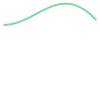

In [41]:
# --- Exemplo 1: B-spline ---
zcit_line_bspline

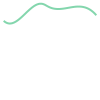

In [42]:
# --- Exemplo 2: Interpolação Cúbica ---
zcit_line_cubic

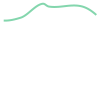

In [43]:
# --- Exemplo 3: Interpolação Akima ---
zcit_line_akima

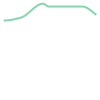

In [44]:
# --- Exemplo 4: Interpolação PCHIP ---
zcit_line_pchip

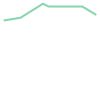

In [45]:
# --- Exemplo 5: Interpolação Linear ---
zcit_line_linear


--- Método: B-spline (Suavização = 0.8, Grau = 2) ---


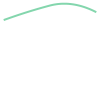

In [46]:
# --- Exemplo 6: B-spline com fator de suavização numérico e grau diferente ---
print("\n--- Método: B-spline (Suavização = 0.8, Grau = 2) ---")
zcit_line_bspline_custom